<a href="https://colab.research.google.com/github/kanjamwingirwa/KPMG_AU_Virtual_Internship/blob/kanja/KPMG_AU_INTERNSHIP_FINAL_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lets load the libraries we require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import plotly.express as px
import warnings
warnings. filterwarnings("ignore")
sns.set_theme()

In [2]:
#lets read the datasets. In this case, we will read a spreadsheet at a time since it has many sheets within the same file
transactions_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='Transactions')
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


In [3]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
Customer_Demographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerDemographic')
Customer_Demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [5]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

# **Data Cleaning - Transactions Table**

In [6]:
#separate the date into year, month, day for exploration purposes
transactions_df['Year'] = transactions_df['transaction_date'].dt.year
transactions_df['Month'] = transactions_df['transaction_date'].dt.month
transactions_df['Day']  = transactions_df['transaction_date'].dt.day

In [7]:
#lets check whether the changes have been implemented
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21


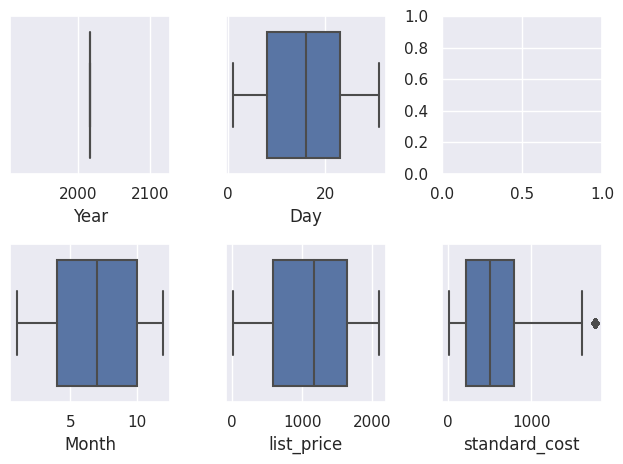

In [8]:
#lets look for outliers
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3)

#create boxplot in each subplot
sns.boxplot(x=transactions_df['Year'], ax=axes[0,0])

sns.boxplot(x=transactions_df['Day'], ax=axes[0,1])

sns.boxplot(x=transactions_df ['Month'], ax=axes[1,0])
sns.boxplot(x=transactions_df['list_price'], ax=axes[1,1])
sns.boxplot(x=transactions_df['standard_cost'], ax=axes[1,2])

plt.tight_layout()

There is an outlier in standard cost

In [9]:
#lets remove the outlier
# Calculate the upper and lower limits
Q1 = transactions_df['standard_cost'].quantile(0.25)
Q3 = transactions_df['standard_cost'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(transactions_df['standard_cost']>=upper)[0]
lower_array = np.where(transactions_df['standard_cost']<=lower)[0]

# Removing the outliers
transactions_df.drop(index=upper_array, inplace=True)
transactions_df.drop(index=lower_array, inplace=True)

In [10]:
#lets check if the chenge has been implemented
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19805 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19805 non-null  int64         
 1   product_id               19805 non-null  int64         
 2   customer_id              19805 non-null  int64         
 3   transaction_date         19805 non-null  datetime64[ns]
 4   online_order             19451 non-null  float64       
 5   order_status             19805 non-null  object        
 6   brand                    19608 non-null  object        
 7   product_line             19608 non-null  object        
 8   product_class            19608 non-null  object        
 9   product_size             19608 non-null  object        
 10  list_price               19805 non-null  float64       
 11  standard_cost            19608 non-null  float64       
 12  product_first_sold_date  19608 n

In [11]:
#lets drop all null values
transactions_df =transactions_df.dropna()

In [12]:
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,2,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,5,21


# **Feature Engineering - Transactions Table**

In [13]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({1: 'January', 2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7:'July'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21


In [14]:
#Change the values in the column day of week to actual days for the data to make more sense
transactions_df['Month'].replace({7: 'July', 8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21


In [15]:
#lets change day into actual name of the day in the week
transactions_df['Day_of_Week'] = transactions_df['transaction_date'].dt.day_name()
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday


In [16]:
#Replace online order column for it to make more sense
transactions_df['online_order'].replace({0.0: 'Not Online', 1.0: 'Online'}, inplace=True)

# print Data frame after replacing the values
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday


In [17]:
#introduce a 'profit margin column'
transactions_df["Profit Margin"] =  transactions_df["list_price"]-transactions_df["standard_cost"]
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday,17.87
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday,1702.55


# **Data Cleaning - Customer Demographic Table**

In [18]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [19]:
#lets delete the 'default' column
Customer_Demographic_df = Customer_Demographic_df.drop(['default'], axis =1)
Customer_Demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0


In [20]:
# to break down DOB into yr, month, day strictly for analysis
Customer_Demographic_df['Year'] = Customer_Demographic_df['DOB'].dt.year
Customer_Demographic_df['Month'] = Customer_Demographic_df['DOB'].dt.month
Customer_Demographic_df['Day']  = Customer_Demographic_df['DOB'].dt.day

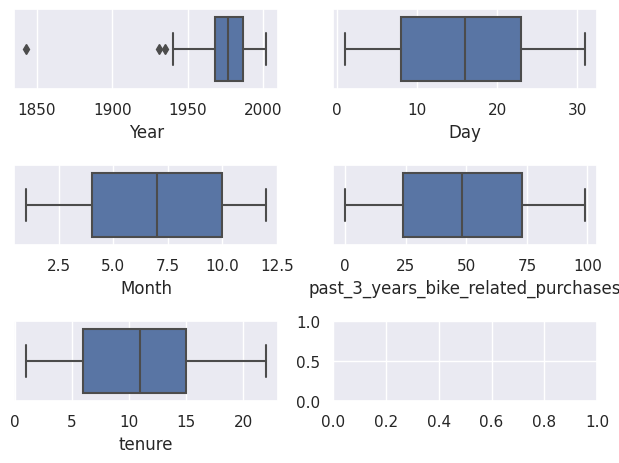

In [21]:
#let's look for outliers
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(3, 2)

#create boxplot in each subplot
sns.boxplot(x=Customer_Demographic_df['Year'], ax=axes[0,0])
sns.boxplot(x=Customer_Demographic_df['Day'], ax=axes[0,1])
sns.boxplot(x=Customer_Demographic_df['Month'], ax=axes[1,0])
sns.boxplot(x=Customer_Demographic_df['past_3_years_bike_related_purchases'], ax=axes[1,1])
sns.boxplot(x=Customer_Demographic_df['tenure'], ax=axes[2,0])

plt.tight_layout()

Somebody was born in 1850, obviously that's a typo

In [22]:
#lets deal with outliers
# Calculate the upper and lower limits
Q1 = Customer_Demographic_df['Year'].quantile(0.25)
Q3 = Customer_Demographic_df['Year'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(Customer_Demographic_df['Year']>=upper)[0]
lower_array = np.where(Customer_Demographic_df['Year']<=lower)[0]

# Removing the outliers
Customer_Demographic_df.drop(index=upper_array, inplace=True)
Customer_Demographic_df.drop(index=lower_array, inplace=True)

In [23]:
#lets check if the outliers have been removed successfuly
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3997 non-null   int64         
 1   first_name                           3997 non-null   object        
 2   last_name                            3872 non-null   object        
 3   gender                               3997 non-null   object        
 4   past_3_years_bike_related_purchases  3997 non-null   int64         
 5   DOB                                  3910 non-null   datetime64[ns]
 6   job_title                            3491 non-null   object        
 7   job_industry_category                3341 non-null   object        
 8   wealth_segment                       3997 non-null   object        
 9   deceased_indicator                   3997 non-null   object        
 10  owns_car    

In [24]:
these_ones =Customer_Demographic_df[['gender', 'job_title', 'wealth_segment', 'job_industry_category', 'deceased_indicator', 'owns_car', 'tenure']]
for column in these_ones:
     print("\n" + column)
     print(Customer_Demographic_df[column].value_counts())


gender
Female    2036
Male      1871
U           87
F            1
Femal        1
M            1
Name: gender, dtype: int64

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      40
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

wealth_segment
Mass Customer        1999
High Net Worth       1021
Affluent Customer     977
Name: wealth_segment, dtype: int64

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                356
Property              267
IT                    222
Entertainment         136
Argiculture   

There are some misspellings that we need to correct in the gender column

In [25]:
Customer_Demographic_df['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male'}, inplace=True)
Customer_Demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Year,Month,Day
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,10.0,12.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,12.0,16.0


In [26]:
#lets drop the last name column as it has too many null and is quite irrelevant anyway
for col in Customer_Demographic_df.columns:
    if 'last_name' in col:
        del Customer_Demographic_df[col]

Customer_Demographic_df.head(5)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Year,Month,Day
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,10.0,12.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,12.0,16.0
2,3,Arlin,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0,1.0,20.0
3,4,Talbot,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961.0,10.0,3.0
4,5,Sheila-kathryn,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0,5.0,13.0


In [27]:
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3997 non-null   int64         
 1   first_name                           3997 non-null   object        
 2   gender                               3997 non-null   object        
 3   past_3_years_bike_related_purchases  3997 non-null   int64         
 4   DOB                                  3910 non-null   datetime64[ns]
 5   job_title                            3491 non-null   object        
 6   job_industry_category                3341 non-null   object        
 7   wealth_segment                       3997 non-null   object        
 8   deceased_indicator                   3997 non-null   object        
 9   owns_car                             3997 non-null   object        
 10  tenure      

In [28]:
Customer_Demographic_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Year,Month,Day
count,3997.000000,3997.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,2001.539655,48.881161,10.657289,1977.087468,6.520205,15.759847
std,1154.591793,28.723687,5.659132,12.580954,3.462399,8.781004
min,1.000000,0.000000,1.000000,1940.000000,1.000000,1.000000
25%,1002.000000,24.000000,6.000000,1968.000000,4.000000,8.000000
50%,2002.000000,48.000000,11.000000,1977.000000,7.000000,16.000000
75%,3001.000000,73.000000,15.000000,1987.000000,10.000000,23.000000
max,4000.000000,99.000000,22.000000,2002.000000,12.000000,31.000000


We shall introduce a new column 'Age' in the dataset then do away with Yr, Month, Day

In [29]:
Customer_Demographic_df["Age"] = 2017 - Customer_Demographic_df["Year"]
Customer_Demographic_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Year,Month,Day,Age
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,10.0,12.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,12.0,16.0,37.0


In [30]:
#Lets drop Year, month, and day
Customer_Demographic_df = Customer_Demographic_df.drop(['Year', 'Month', 'Day'], axis =1)
Customer_Demographic_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0


In [31]:
Customer_Demographic_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Age
count,3997.000000,3997.000000,3910.000000,3910.000000
mean,2001.539655,48.881161,10.657289,39.912532
std,1154.591793,28.723687,5.659132,12.580954
min,1.000000,0.000000,1.000000,15.000000
25%,1002.000000,24.000000,6.000000,30.000000
50%,2002.000000,48.000000,11.000000,40.000000
75%,3001.000000,73.000000,15.000000,49.000000
max,4000.000000,99.000000,22.000000,77.000000


Let's fill the null values with means

In [32]:
#fill the age column with 39 which is the mean
Customer_Demographic_df['Age'].fillna(value=39, inplace=True)

In [33]:
#fill the tenure column with 10 which is the mean
Customer_Demographic_df['tenure'].fillna(value=10, inplace=True)

In [34]:
#fill the job_industry_category column with 'manufacturing' which is the mean
Customer_Demographic_df['job_industry_category'].fillna(value='manufacturing', inplace=True)

In [35]:
#lets check to see if the changes have been implemented
Customer_Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3997 non-null   int64         
 1   first_name                           3997 non-null   object        
 2   gender                               3997 non-null   object        
 3   past_3_years_bike_related_purchases  3997 non-null   int64         
 4   DOB                                  3910 non-null   datetime64[ns]
 5   job_title                            3491 non-null   object        
 6   job_industry_category                3997 non-null   object        
 7   wealth_segment                       3997 non-null   object        
 8   deceased_indicator                   3997 non-null   object        
 9   owns_car                             3997 non-null   object        
 10  tenure      

Just do away with job_title and work with industries

In [36]:
for col in Customer_Demographic_df.columns:
    if 'job_title' in col:
        del Customer_Demographic_df[col]

Customer_Demographic_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0,37.0


In [37]:
Customer_df =Customer_Demographic_df.copy()

In [38]:
transcation_df = transactions_df.copy()

In [39]:
transcation_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday,17.87
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday,1702.55


# **Univariate Analysis-Customers**

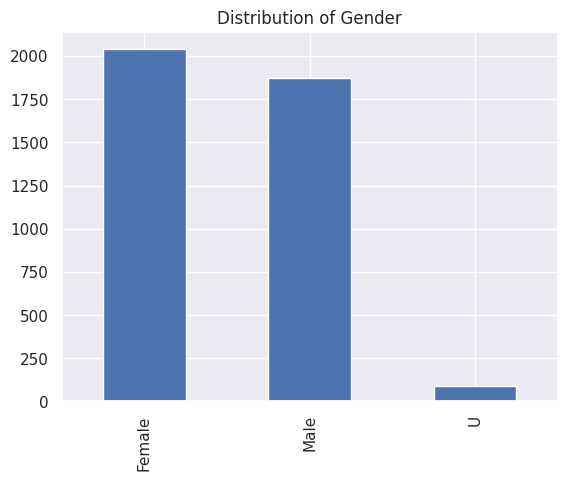

In [40]:
#Distribution of Gender
Customer_Demographic_df['gender'].value_counts().plot(kind='bar', title='Distribution of Gender');

There were slightly more females than males

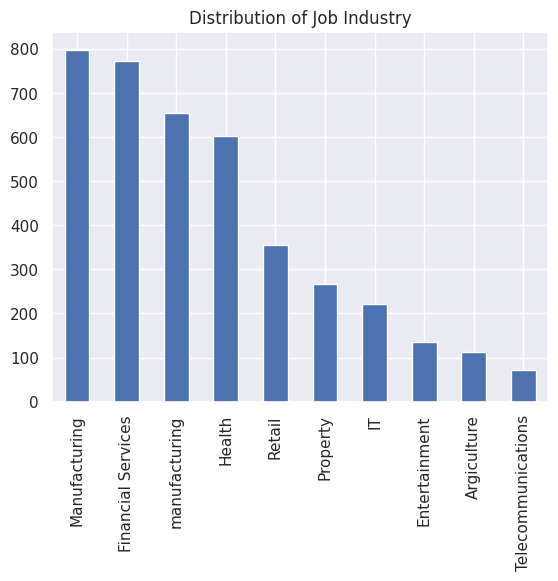

In [41]:
#Distribution of Job Industry
Customer_Demographic_df['job_industry_category'].value_counts().plot(kind='bar', title='Distribution of Job Industry');

Most Customers are in Manufacturing industry

In [42]:
age_counts = Customer_Demographic_df["Age"].value_counts()

In [43]:
fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)
fig.show()

Most customers are middle aged witht the highest values being between 39-41 yrs

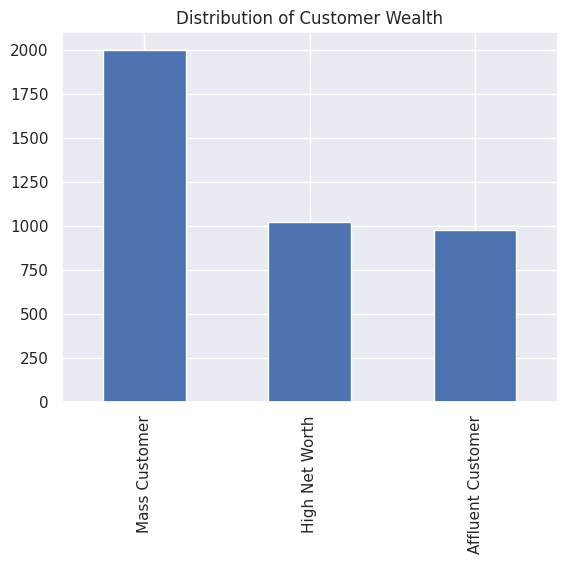

In [44]:
#Distribution of Customer Wealth
Customer_Demographic_df['wealth_segment'].value_counts().plot(kind='bar', title='Distribution of Customer Wealth');


Most customers were mass customers ie the regular customer

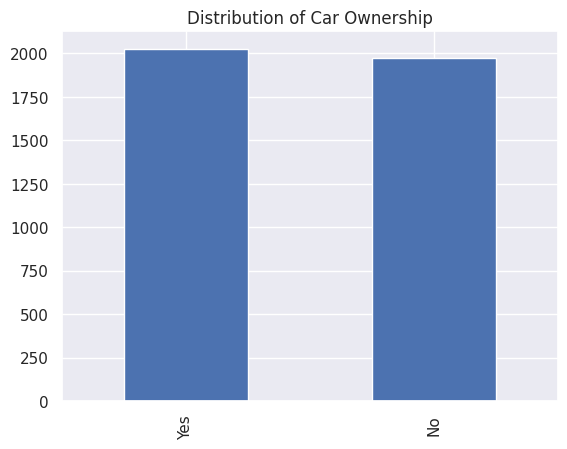

In [45]:
#Distribution of Car Ownership
Customer_Demographic_df['owns_car'].value_counts().plot(kind='bar', title='Distribution of Car Ownership');

There is an equal distribution btn those who own cars and those who don't

In [46]:
#Distribution of Tenure
tenure_counts = Customer_Demographic_df["tenure"].value_counts()

In [47]:
fig = px.bar(tenure_counts, title="Employee Tenure")
fig.update_layout(
    xaxis_title = "Tenure",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False)

The tenure distribution is normal with most people having 10 yrs

# **Univariate Analysis - Transactions**

In [66]:
transactions_df.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,Year,Day,Profit Margin
count,19256.000000,19256.000000,19256.000000,19256.000000,19256.000000,19256.00000,19256.0,19256.000000,19256.000000
mean,9986.408288,45.648785,1739.628531,1098.797813,543.765254,38181.00000,2017.0,15.572185,555.032558
std,5778.346662,30.684025,1012.049351,579.072593,389.549013,2878.88278,0.0,8.666011,494.508149
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.00000,2017.0,1.000000,4.800000
25%,4976.750000,18.000000,857.000000,575.270000,215.140000,35560.00000,2017.0,8.000000,133.780000
50%,9985.500000,44.000000,1743.000000,1151.960000,464.720000,38206.00000,2017.0,16.000000,445.210000
75%,14988.250000,73.000000,2615.000000,1577.530000,778.690000,40672.00000,2017.0,23.000000,830.240000
max,20000.000000,100.000000,5034.000000,2091.470000,1610.900000,42710.00000,2017.0,31.000000,1702.550000


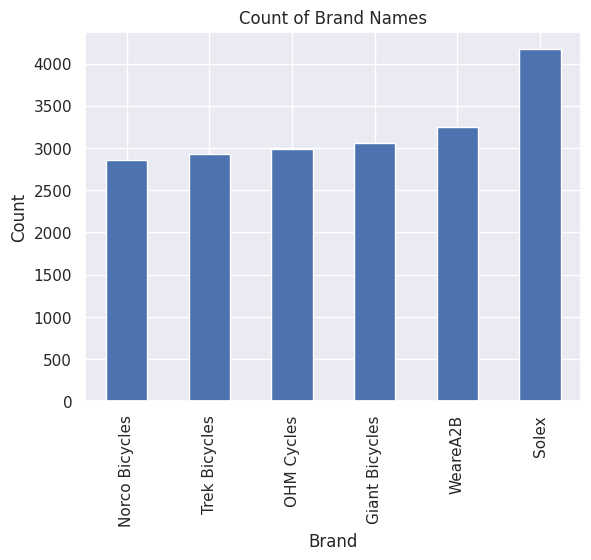

In [48]:
#count of brand names
transactions_df['brand'].value_counts().sort_values().plot(kind='bar', xlabel='Brand', ylabel='Count', title='Count of Brand Names');


Solex is the most popular brand name bought

<Axes: title={'center': 'Online Vs Offline Orders'}, xlabel='online_order', ylabel='Count'>

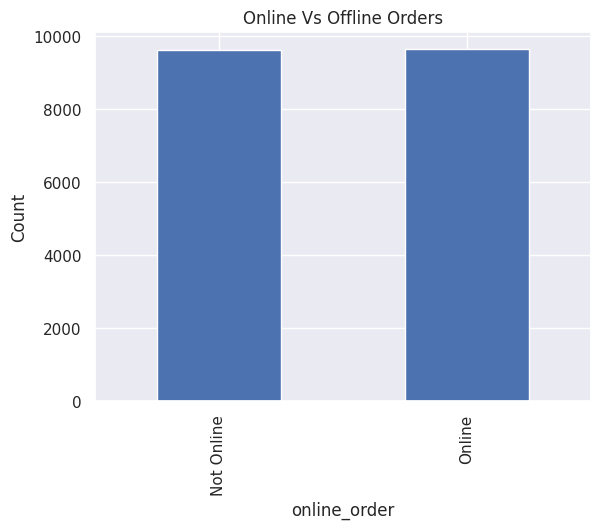

In [49]:
#Types of orders
transactions_df['online_order'].value_counts().sort_values().plot(kind='bar', xlabel='online_order', ylabel='Count', title='Online Vs Offline Orders')

There is an almost equal distribution between online orders and orders

<Axes: title={'center': 'Count of Product Line'}, xlabel='Product Line', ylabel='Count'>

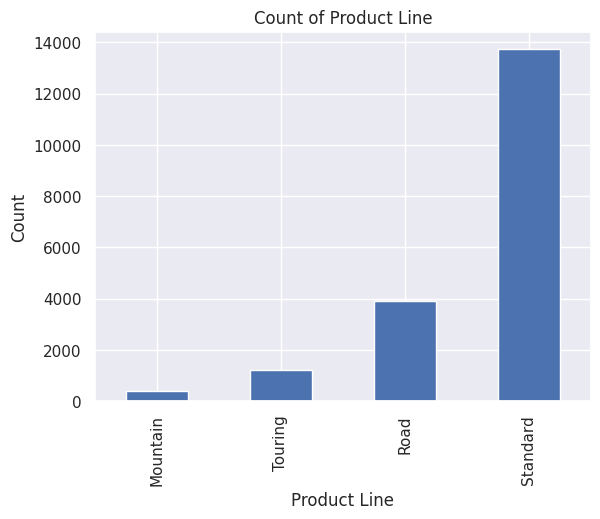

In [50]:
#Distribution of Product Lines
transactions_df['product_line'].value_counts().sort_values().plot(kind='bar', xlabel='Product Line', ylabel='Count', title='Count of Product Line')

The most popular product line was standard.

<Axes: title={'center': 'Count of Product Size'}, xlabel='Brand', ylabel='Count'>

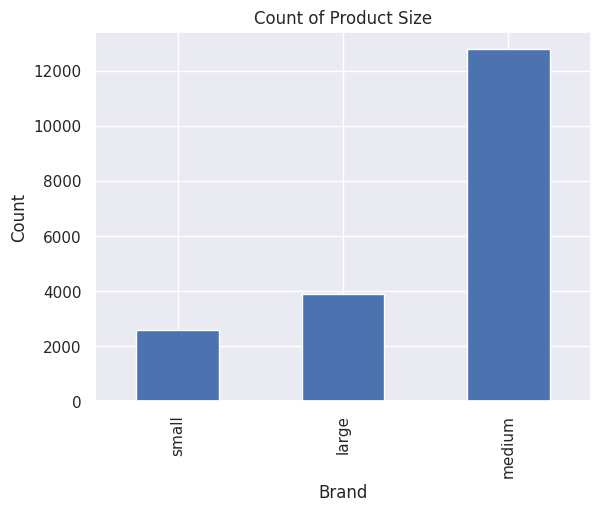

In [51]:
#Distribution of Product Size
transactions_df['product_size'].value_counts().sort_values().plot(kind='bar', xlabel='Brand', ylabel='Count', title='Count of Product Size')

Medium is the most popular product size

In [56]:
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday,17.87
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday,1702.55


In [53]:
from calendar import day_name

In [54]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
          'Friday', 'Saturday', 'Sunday']

<Axes: title={'center': 'Distribution of Sales across the Week'}, xlabel='Day of the Week', ylabel='Count'>

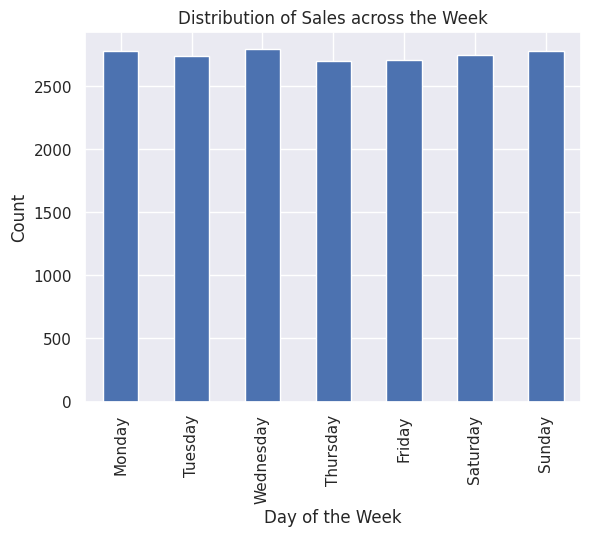

In [59]:
transactions_df['Day_of_Week'].value_counts().reindex(days_of_week).plot(kind='bar', xlabel='Day of the Week', ylabel='Count', title='Distribution of Sales across the Week')

Sales seem to be equally distributed throughout the week.

In [60]:
from calendar import month_name
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

<Axes: title={'center': 'Distribution of Sales across the Months of the Year'}, xlabel='Months of the Year', ylabel='Count'>

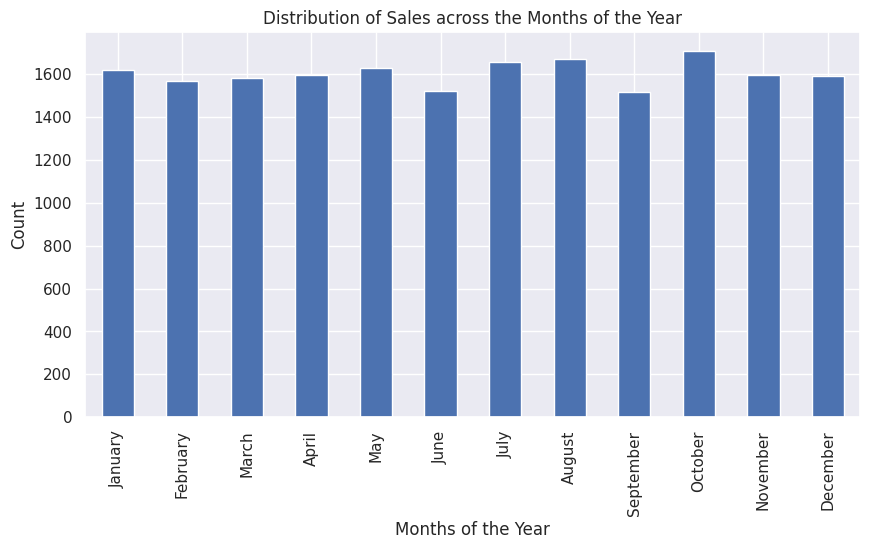

In [64]:
transactions_df['transaction_date'].dt.strftime('%B').value_counts().reindex(months).plot.bar(figsize=(10,5), xlabel='Months of the Year', ylabel='Count', title='Distribution of Sales across the Months of the Year')

There is equal distribution across the months but there was a bit of an increase in October

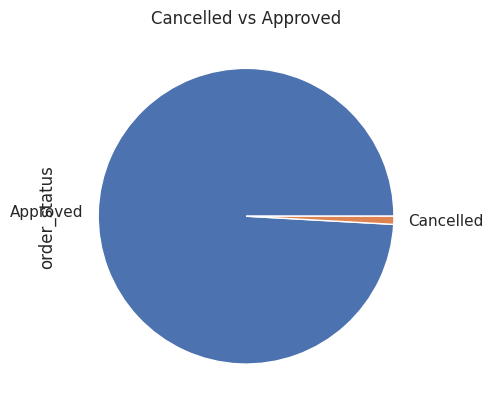

In [65]:
#Distribution of order status
transactions_df['order_status'].value_counts().plot(kind='pie', title='Cancelled vs Approved');

Very few orders were cancelled

In [82]:
mean_by_day = transactions_df.groupby(['Day_of_Week'])['Profit Margin'].mean().reindex(days_of_week)
print(mean_by_day)

Day_of_Week
Monday       540.751653
Tuesday      550.639660
Wednesday    564.754801
Thursday     562.708912
Friday       556.427081
Saturday     568.306195
Sunday       541.949853
Name: Profit Margin, dtype: float64


In [84]:
mean_by_month = transactions_df.groupby(['Month'])['Profit Margin'].mean().reindex(months)
print(mean_by_month)

Month
January      563.028531
February     542.308119
March        544.704618
April        554.399956
May          553.754192
June         550.954409
July         553.725160
August       565.180102
September    553.528307
October      565.005137
November     563.356299
December     548.630415
Name: Profit Margin, dtype: float64


In [71]:
transactions_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin
0,1,2,2950,2017-02-25,Not Online,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017,February,25,Saturday,17.87
1,2,3,3120,2017-05-21,Online,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017,May,21,Sunday,1702.55


In [77]:

Months_of_the_Year = transactions_df[['Month','Profit Margin']]
Months_of_the_Year = pd.DataFrame(Months_of_the_Year.groupby(['Month'])['Profit Margin'].sum()).reindex(months)
Months_of_the_Year.sort_values(by=['Month','Profit Margin']).reindex(months)


,Profit Margin
Month,
January,912106.219988
February,850339.130000
March,862267.410000
April,885376.730000
May,900958.070000
June,838552.610000
July,916415.140000
August,944415.950000
September,840255.970000


<Axes: title={'center': 'Profit Margin Across the Months'}, xlabel='Month'>

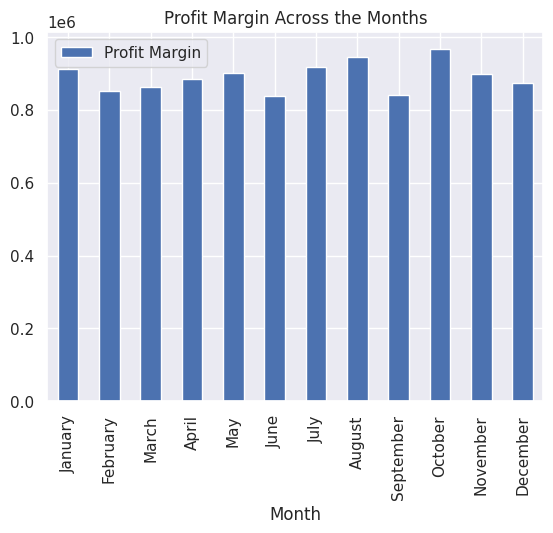

In [79]:
Months_of_the_Year.plot(kind='bar', title = 'Profit Margin Across the Months')

It would seem that neither the day nor the month has a signifcant impact.

In [86]:
mean_by_ordertype = transactions_df.groupby(['online_order'])['Profit Margin'].mean()
print(mean_by_ordertype)

online_order
Not Online    558.163663
Online        551.907302
Name: Profit Margin, dtype: float64


In [88]:
mean_by_brand = transactions_df.groupby(['brand'])['Profit Margin'].mean()
print(mean_by_brand)

brand
Giant Bicycles    491.016648
Norco Bicycles    298.027111
OHM Cycles        485.653966
Solex             565.082841
Trek Bicycles     616.622689
WeareA2B          837.499439
Name: Profit Margin, dtype: float64


<Axes: title={'center': 'Profit Margin Per Brand'}, xlabel='brand'>

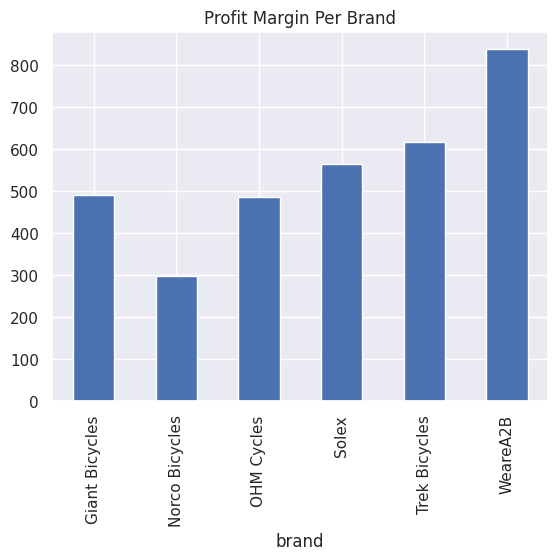

In [89]:
mean_by_brand.plot(kind='bar', title = 'Profit Margin Per Brand')

Trek bicycles may not sell in large numbers but they bring a lot of profit. On the other hand, Solex bicycles sell in huge numbers but do not bring in the most revenue.

In [94]:
sum_by_product_line = transactions_df.groupby(['product_line'])['Profit Margin'].sum()
print(sum_by_product_line)

product_line
Mountain    4.036146e+04
Road        1.374718e+06
Standard    7.947300e+06
Touring     1.325327e+06
Name: Profit Margin, dtype: float64


<Axes: title={'center': 'Profit Margin Per Product Line'}, xlabel='product_line'>

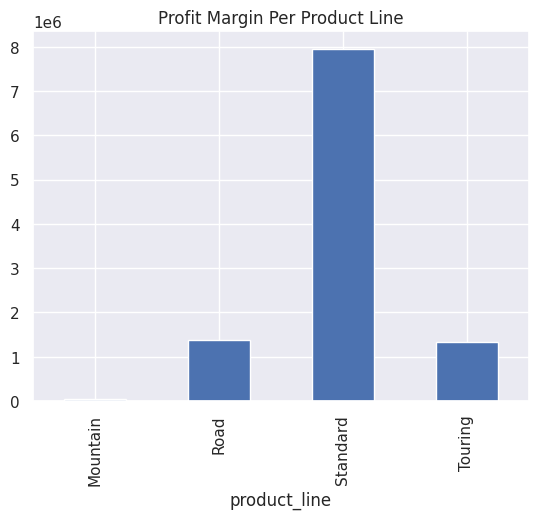

In [95]:
sum_by_product_line.plot(kind='bar', title = 'Profit Margin Per Product Line')

In [91]:
mean_by_product_line = transactions_df.groupby(['product_line'])['Profit Margin'].mean()
print(mean_by_product_line)

product_line
Mountain      96.558517
Road         353.035045
Standard     578.785225
Touring     1092.602712
Name: Profit Margin, dtype: float64


<Axes: title={'center': 'Profit Margin Per Product Line'}, xlabel='product_line'>

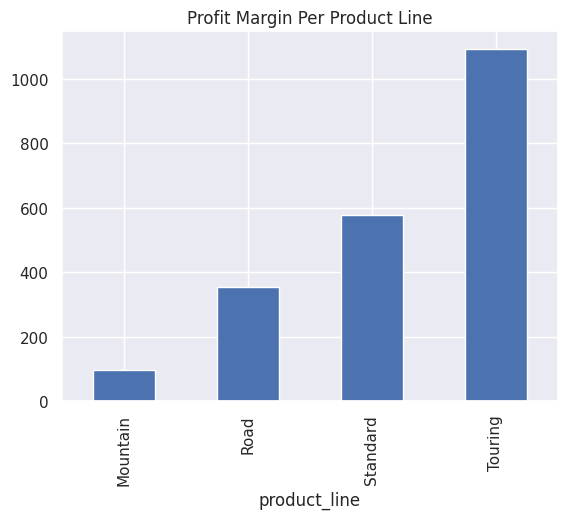

In [92]:
mean_by_product_line.plot(kind='bar', title = 'Profit Margin Per Product Line')

Very few touring bicycles are sold but the profit is astounding

In [96]:
mean_by_product_line = transactions_df.groupby(['product_size'])['Profit Margin'].mean()
print(mean_by_product_line)

product_size
large     916.703251
medium    529.425131
small     136.498115
Name: Profit Margin, dtype: float64


The large sizes had the most profit per product

In [97]:
mean_by_product_line = transactions_df.groupby(['product_class'])['Profit Margin'].mean()
print(mean_by_product_line)

product_class
high      380.228505
low       405.536989
medium    622.554287
Name: Profit Margin, dtype: float64


The medium had the most profits per product

In [99]:
#to see how revenues change over time we need to merge transactions_df with Customer_Demographic_df
combined_df = pd.merge(Customer_Demographic_df,transactions_df,on='customer_id')
combined_df.tail(5)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin
19227,3500,Josy,Female,71,1967-07-21,Entertainment,Affluent Customer,N,No,17.0,...,medium,medium,792.90,594.68,33879.0,2017,January,9,Monday,198.22
19228,3500,Josy,Female,71,1967-07-21,Entertainment,Affluent Customer,N,No,17.0,...,medium,medium,1228.07,400.91,36668.0,2017,February,16,Thursday,827.16
19229,3500,Josy,Female,71,1967-07-21,Entertainment,Affluent Customer,N,No,17.0,...,medium,small,1311.44,1167.18,33888.0,2017,August,8,Tuesday,144.26
19230,3500,Josy,Female,71,1967-07-21,Entertainment,Affluent Customer,N,No,17.0,...,medium,medium,60.34,45.26,34165.0,2017,January,11,Wednesday,15.08
19231,3500,Josy,Female,71,1967-07-21,Entertainment,Affluent Customer,N,No,17.0,...,high,medium,1458.17,874.90,38750.0,2017,March,14,Tuesday,583.27


In [100]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19232 entries, 0 to 19231
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19232 non-null  int64         
 1   first_name                           19232 non-null  object        
 2   gender                               19232 non-null  object        
 3   past_3_years_bike_related_purchases  19232 non-null  int64         
 4   DOB                                  18808 non-null  datetime64[ns]
 5   job_industry_category                19232 non-null  object        
 6   wealth_segment                       19232 non-null  object        
 7   deceased_indicator                   19232 non-null  object        
 8   owns_car                             19232 non-null  object        
 9   tenure                               19232 non-null  float64       
 10  Age       

In [101]:
#to get total revenue we shall use the payments df
total_payments = combined_df['Profit Margin'].sum()
print(total_payments)


10674589.450000001


The total profit margin stood at about 10.6mil

In [102]:
total_products = combined_df['product_id'].nunique()
print(total_products)

100


100 unique products were sold

In [103]:
total_customers = combined_df['customer_id'].nunique()
print(total_customers)

3486


There were 3486 unique customers

In [104]:
top_10 = (combined_df['first_name'].value_counts()).iloc[:10]
print(top_10)

Corabelle    36
Tobe         30
Lindsay      27
Emlyn        27
Catie        26
Max          25
Gar          24
Keeley       24
Brita        23
Basile       22
Name: first_name, dtype: int64


These are the 10 most recurrent customers.

In [105]:
#top_10 customers by sales
top_10_sales = pd.pivot_table(
   combined_df,
   index=['first_name'],
   aggfunc={'Profit Margin': np.sum,}
).sort_values(['Profit Margin'],  ascending=[False]).iloc[:10]
print(top_10_sales)

            Profit Margin
first_name               
Corabelle        19912.52
Tobe             18452.92
Lindsay          16692.97
Marcile          16652.75
Tye              16320.21
Shamus           15023.42
Gar              14898.77
Catie            14392.66
Keeley           14279.63
Basile           14250.06


The list does not change much even when we include profits

In [107]:
#top_10 products by sales
top_10_sales_by_job_category = pd.pivot_table(
   combined_df,
   index=['job_industry_category'],
   aggfunc={'Profit Margin': np.sum,}
).sort_values(['Profit Margin'],  ascending=[False]).iloc[:10]
print(top_10_sales)

                       Profit Margin
job_industry_category               
Manufacturing             2118800.42
Financial Services        2104755.69
manufacturing             1731876.39
Health                    1627196.65
Retail                     951051.62
Property                   685718.50
IT                         592321.30
Entertainment              377815.30
Argiculture                299261.18
Telecommunications         185792.40


In [111]:
mean_by_product_line = combined_df.groupby(['wealth_segment'])['Profit Margin'].mean()
print(mean_by_product_line)

wealth_segment
Affluent Customer    558.151752
High Net Worth       554.025965
Mass Customer        554.063714
Name: Profit Margin, dtype: float64


Interestingly, there is very little difference between the profit margins as determined by the wealth of the customers.

In [108]:
#let's check or multicollinearity
corr = combined_df.corr()
corr

,customer_id,past_3_years_bike_related_purchases,tenure,Age,transaction_id,product_id,list_price,standard_cost,product_first_sold_date,Year,Day,Profit Margin
customer_id,1.000000,0.003017,-0.024728,-0.026029,0.001083,0.003956,0.013080,0.008251,-0.001453,NaN,0.008140,0.008819
past_3_years_bike_related_purchases,0.003017,1.000000,-0.020517,-0.040070,-0.003506,-0.000550,0.007891,-0.008292,0.005040,NaN,0.002083,0.015773
tenure,-0.024728,-0.020517,1.000000,0.448296,0.004347,-0.010152,-0.009034,-0.018103,0.000389,NaN,-0.007996,0.003680
Age,-0.026029,-0.040070,0.448296,1.000000,-0.005803,-0.005710,-0.003312,0.001258,0.007778,NaN,-0.000193,-0.004869
transaction_id,0.001083,-0.003506,0.004347,-0.005803,1.000000,-0.012275,-0.007022,-0.003441,0.004302,NaN,0.002018,-0.005512
product_id,0.003956,-0.000550,-0.010152,-0.005710,-0.012275,1.000000,0.083778,0.025559,-0.058296,NaN,0.004976,0.077978
list_price,0.013080,0.007891,-0.009034,-0.003312,-0.007022,0.083778,1.000000,0.537636,0.048835,NaN,-0.003836,0.747589
standard_cost,0.008251,-0.008292,-0.018103,0.001258,-0.003441,0.025559,0.537636,1.000000,0.009681,NaN,0.004740,-0.158076
product_first_sold_date,-0.001453,0.005040,0.000389,0.007778,0.004302,-0.058296,0.048835,0.009681,1.000000,NaN,-0.010535,0.049563
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


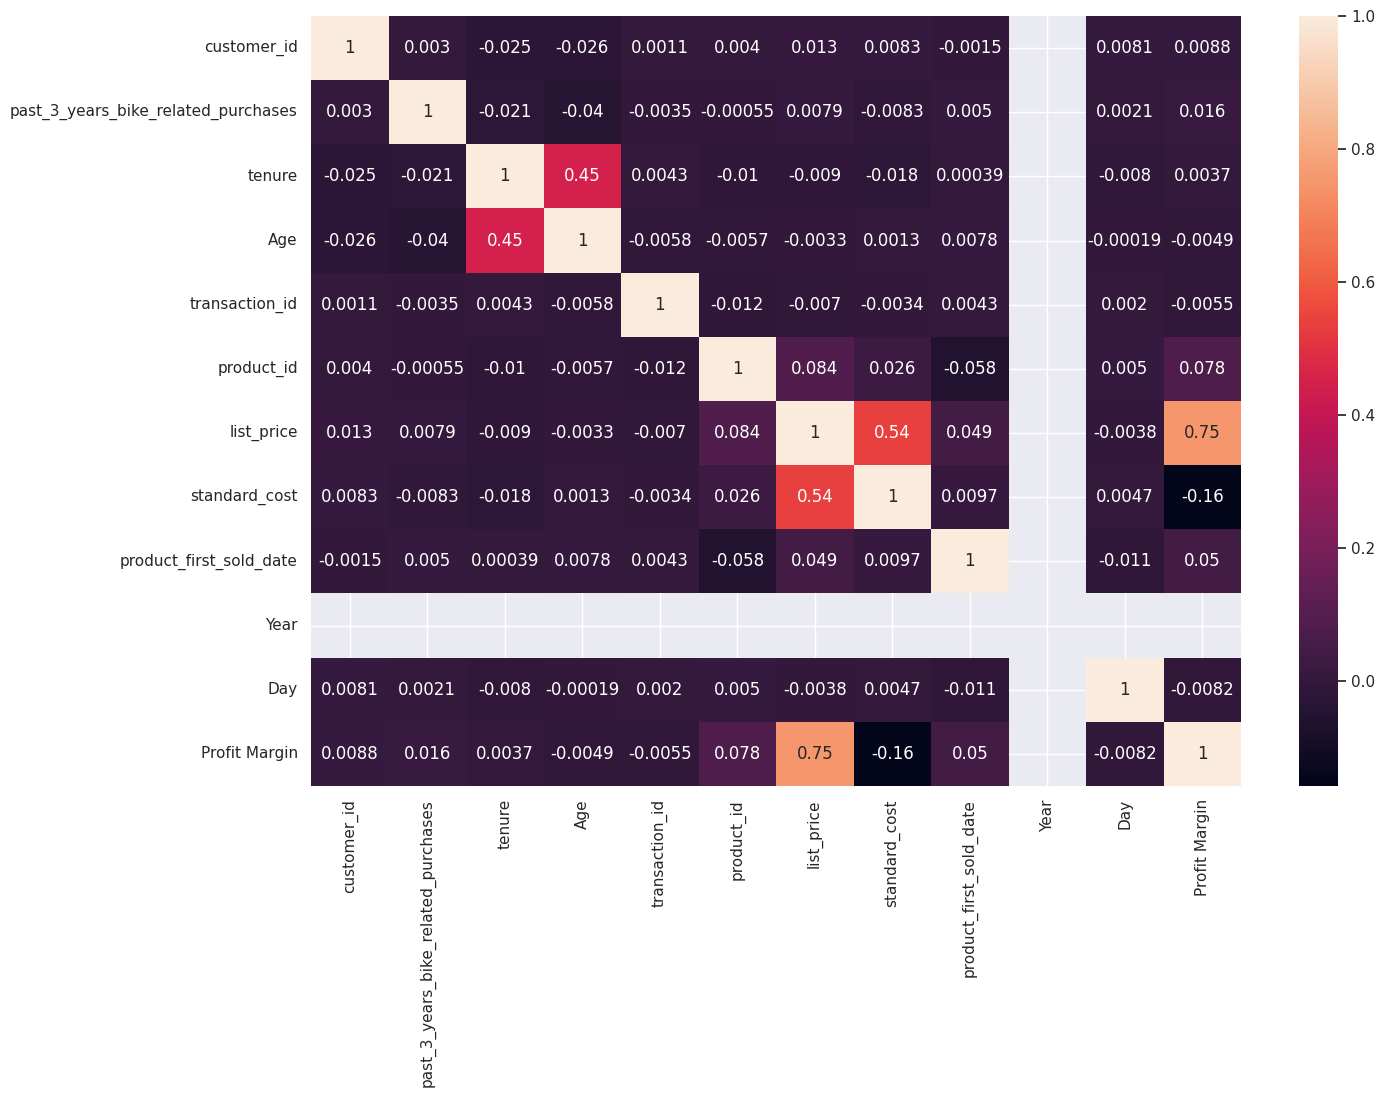

In [109]:
#use a heatmap to viasualize the above correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

The following were noted:


1.   There is a moderate correlation between age and tenure
2.   There is a strong correlation between the list price and profit margin
3.   There is a moderate correlation between standard cost and list price.
4.   There is a strong correlation between standard cost and profit margin



In [113]:
combined_df.loc[combined_df['Age']<=19, 'age_group'] = 'teenage'
combined_df.loc[combined_df['Age'].between(20,24), 'age_group'] = 'young adult'
combined_df.loc[combined_df['Age'].between(25,35), 'age_group'] = 'adult'
combined_df.loc[combined_df['Age'].between(36,55), 'age_group'] = 'middle age'
combined_df.loc[combined_df['Age']>55, 'age_group'] = 'seniors'


In [114]:
combined_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin,age_group
0,1,Laraine,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,...,medium,235.63,125.07,38482.0,2017,December,23,Saturday,110.56,seniors
1,1,Laraine,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,...,medium,1577.53,826.51,39526.0,2017,April,6,Thursday,751.02,seniors


In [120]:
mean_by_age_group = combined_df.groupby(['age_group'])['Profit Margin'].mean()
print(mean_by_age_group)

age_group
adult          558.156256
middle age     556.666902
seniors        543.379220
teenage        565.885572
young adult    550.348617
Name: Profit Margin, dtype: float64


In [121]:
sum_by_age_group = combined_df.groupby(['age_group'])['Profit Margin'].sum()
print(sum_by_age_group)

age_group
adult          1903870.99
middle age     5750925.76
seniors        1406808.80
teenage         598141.05
young adult    1014842.85
Name: Profit Margin, dtype: float64


Teenagers bring in the most in terms on profit margin on average per person however, middle aged people bring in the most in terms of total profits

In [123]:
age_group_by_brand = combined_df.groupby(['age_group'])['brand'].value_counts()
print(age_group_by_brand)

age_group    brand         
adult        Solex              735
             WeareA2B           566
             OHM Cycles         554
             Trek Bicycles      522
             Giant Bicycles     521
             Norco Bicycles     513
middle age   Solex             2214
             WeareA2B          1778
             Giant Bicycles    1627
             OHM Cycles        1596
             Trek Bicycles     1572
             Norco Bicycles    1544
seniors      Solex              560
             Giant Bicycles     454
             WeareA2B           419
             OHM Cycles         390
             Trek Bicycles      385
             Norco Bicycles     381
teenage      Solex              235
             WeareA2B           183
             Giant Bicycles     171
             Norco Bicycles     159
             OHM Cycles         157
             Trek Bicycles      152
young adult  Solex              420
             WeareA2B           295
             Trek Bicycles      294


<Axes: xlabel='brand'>

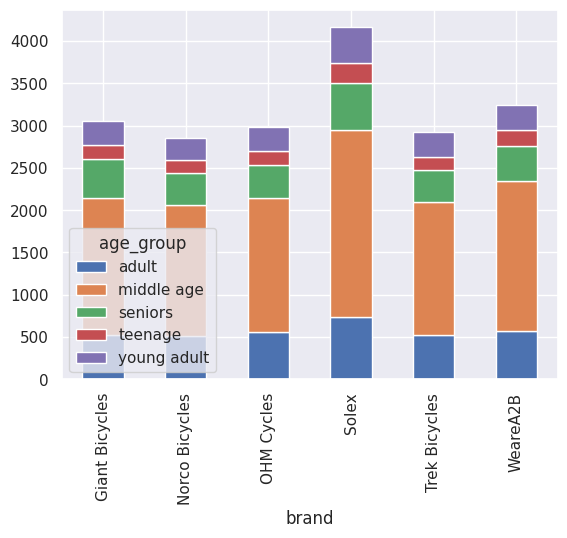

In [142]:
pd.crosstab(combined_df['brand'],combined_df['age_group']).plot(kind='bar',stacked=True)

In [143]:
age_group_by_brand = combined_df.groupby(['age_group'])['product_size'].value_counts()
print(age_group_by_brand)

age_group    product_size
adult        medium          2260
             large            700
             small            451
middle age   medium          6853
             large           2094
             small           1384
seniors      medium          1730
             large            512
             small            347
teenage      medium           684
             large            218
             small            155
young adult  medium          1225
             large            372
             small            247
Name: product_size, dtype: int64


<Axes: xlabel='product_size'>

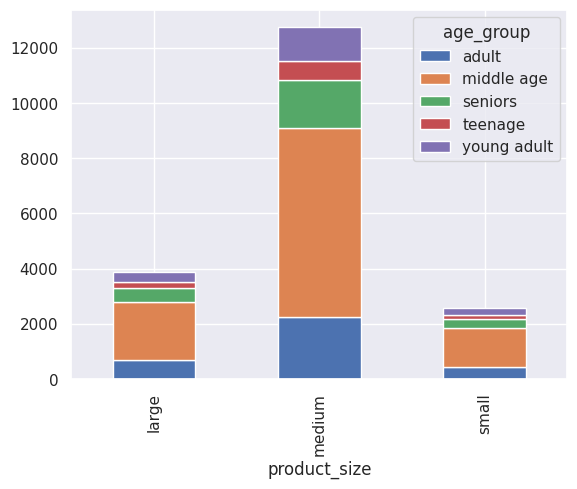

In [144]:
pd.crosstab(combined_df['product_size'],combined_df['age_group']).plot(kind='bar',stacked=True)

<Axes: xlabel='product_class'>

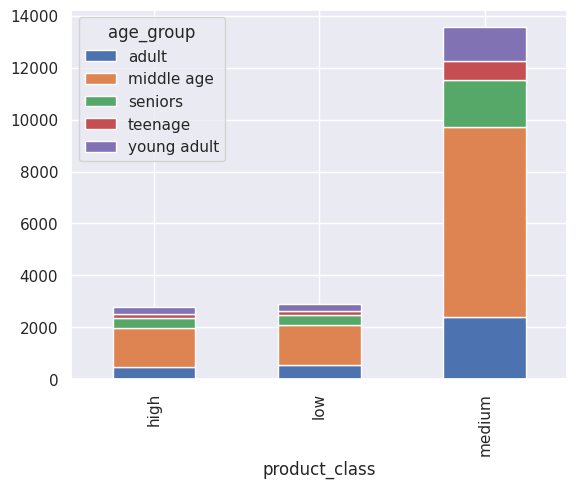

In [150]:
pd.crosstab(combined_df['product_class'],combined_df['age_group']).plot(kind='bar',stacked=True)

In [149]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19232 entries, 0 to 19231
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19232 non-null  int64         
 1   first_name                           19232 non-null  object        
 2   gender                               19232 non-null  object        
 3   past_3_years_bike_related_purchases  19232 non-null  int64         
 4   DOB                                  18808 non-null  datetime64[ns]
 5   job_industry_category                19232 non-null  object        
 6   wealth_segment                       19232 non-null  object        
 7   deceased_indicator                   19232 non-null  object        
 8   owns_car                             19232 non-null  object        
 9   tenure                               19232 non-null  float64       
 10  Age       

<Axes: xlabel='gender'>

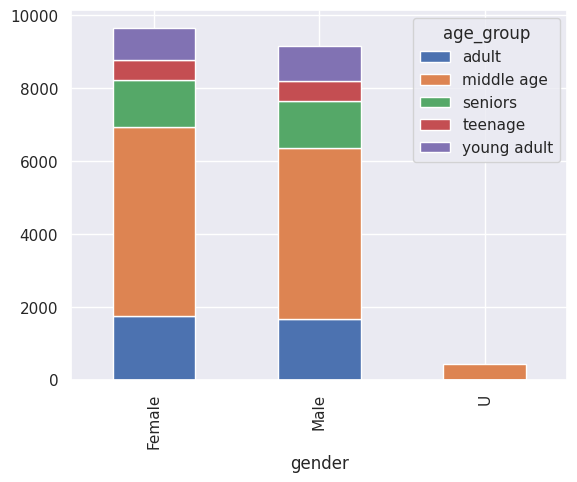

In [146]:
pd.crosstab(combined_df['gender'],combined_df['age_group']).plot(kind='bar',stacked=True)

<Axes: xlabel='gender'>

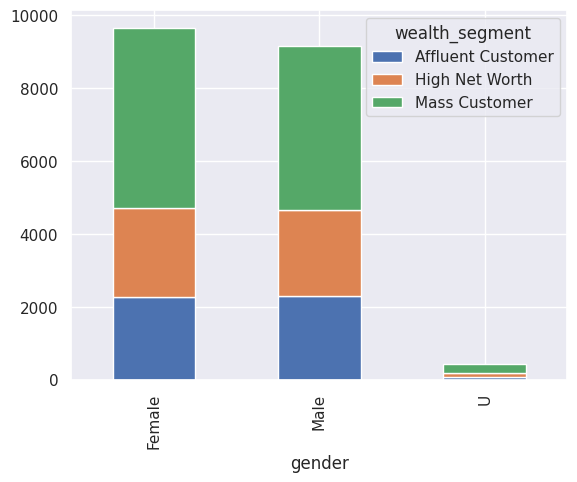

In [147]:
pd.crosstab(combined_df['gender'],combined_df['wealth_segment']).plot(kind='bar',stacked=True)

<Axes: xlabel='wealth_segment'>

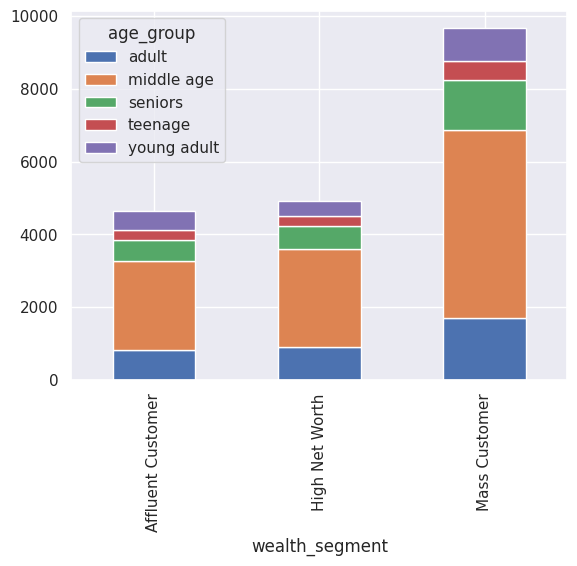

In [148]:
pd.crosstab(combined_df['wealth_segment'],combined_df['age_group']).plot(kind='bar',stacked=True)

<Axes: xlabel='online_order'>

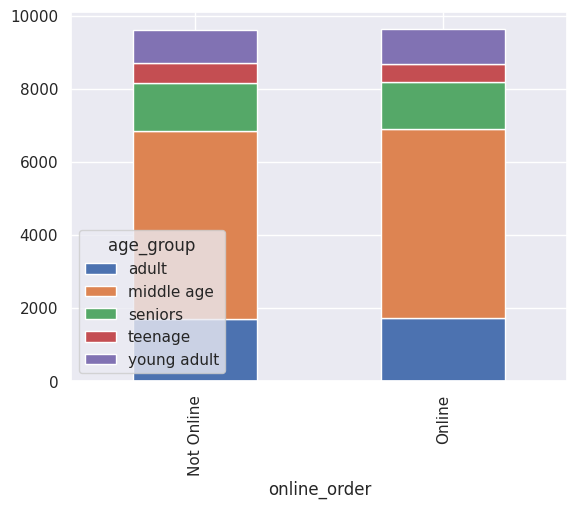

In [151]:
pd.crosstab(combined_df['online_order'],combined_df['age_group']).plot(kind='bar',stacked=True)

<Axes: xlabel='online_order'>

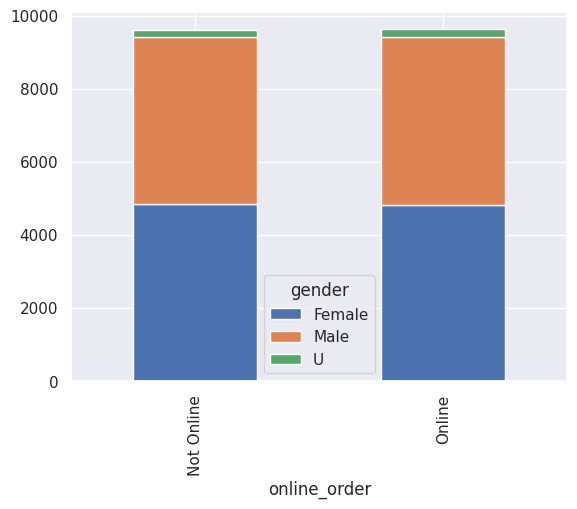

In [153]:
pd.crosstab(combined_df['online_order'],combined_df['gender']).plot(kind='bar',stacked=True)

<Axes: xlabel='Month'>

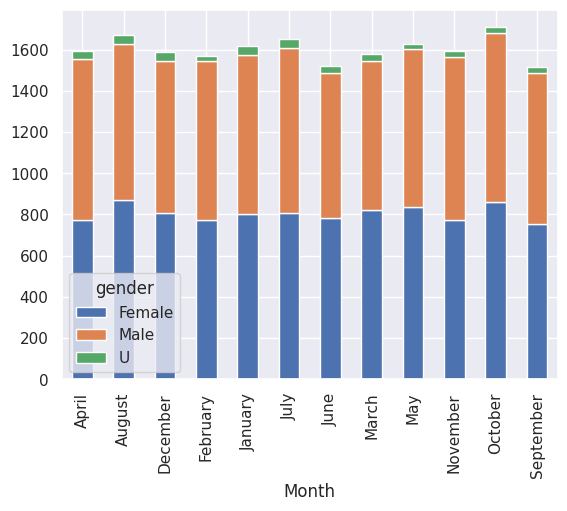

In [159]:
pd.crosstab(combined_df['Month'],combined_df['gender']).plot(kind='bar',stacked=True)

In [160]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19232 entries, 0 to 19231
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19232 non-null  int64         
 1   first_name                           19232 non-null  object        
 2   gender                               19232 non-null  object        
 3   past_3_years_bike_related_purchases  19232 non-null  int64         
 4   DOB                                  18808 non-null  datetime64[ns]
 5   job_industry_category                19232 non-null  object        
 6   wealth_segment                       19232 non-null  object        
 7   deceased_indicator                   19232 non-null  object        
 8   owns_car                             19232 non-null  object        
 9   tenure                               19232 non-null  float64       
 10  Age       

In [161]:
combination_df= combined_df.copy()
combination_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin,age_group
0,1,Laraine,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,...,medium,235.63,125.07,38482.0,2017,December,23,Saturday,110.56,seniors
1,1,Laraine,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,...,medium,1577.53,826.51,39526.0,2017,April,6,Thursday,751.02,seniors


In [162]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
categ= ['online_order', 'order_status', 'brand', 'product_line', 'product_size', 'product_class', 'owns_car', 'tenure', 'wealth_segment', 'gender', 'job_industry_category', 'deceased_indicator']
le = LabelEncoder()
combination_df[categ] = combination_df[categ].apply(le.fit_transform)


In [164]:
combination_df['age_group'] = le.fit_transform(combination_df['age_group'])

In [165]:
combination_df.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,product_size,list_price,standard_cost,product_first_sold_date,Year,Month,Day,Day_of_Week,Profit Margin,age_group
0,1,Laraine,0,93,1953-10-12,3,2,0,1,10,...,1,235.63,125.07,38482.0,2017,December,23,Saturday,110.56,2
1,1,Laraine,0,93,1953-10-12,3,2,0,1,10,...,1,1577.53,826.51,39526.0,2017,April,6,Thursday,751.02,2


In [166]:
#let's check or multicollinearity
corr = combination_df.corr()
corr

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,transaction_id,...,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Year,Day,Profit Margin,age_group
customer_id,1.000000,-0.014034,0.003017,0.026234,0.002285,-0.019923,0.022379,-0.024728,-0.026029,0.001083,...,-0.009108,-0.002759,-0.006870,0.013080,0.008251,-0.001453,NaN,0.008140,0.008819,0.039374
gender,-0.014034,1.000000,0.006574,-0.033198,-0.011405,-0.019567,-0.004553,-0.012067,-0.015158,0.005759,...,0.010120,0.001440,-0.007658,0.014512,0.002934,-0.003017,NaN,0.008871,0.014683,0.000836
past_3_years_bike_related_purchases,0.003017,0.006574,1.000000,-0.009551,-0.001817,0.023702,0.003023,-0.020517,-0.040070,-0.003506,...,0.011022,0.007717,0.003386,0.007891,-0.008292,0.005040,NaN,0.002083,0.015773,0.003764
job_industry_category,0.026234,-0.033198,-0.009551,1.000000,-0.004465,-0.013407,-0.021759,-0.010576,0.030220,-0.004280,...,0.004167,0.006330,-0.015355,-0.001689,-0.001610,0.004162,NaN,0.003141,-0.000710,-0.004469
wealth_segment,0.002285,-0.011405,-0.001817,-0.004465,1.000000,-0.031263,-0.028849,0.009354,0.012205,0.001722,...,-0.007890,-0.003379,0.006783,-0.001041,0.002336,-0.007530,NaN,0.013699,-0.003059,-0.015659
deceased_indicator,-0.019923,-0.019567,0.023702,-0.013407,-0.031263,1.000000,0.020216,-0.016925,0.011819,0.009389,...,0.011114,0.008748,0.002414,0.013850,-0.000925,-0.010130,NaN,-0.004589,0.016948,-0.006426
owns_car,0.022379,-0.004553,0.003023,-0.021759,-0.028849,0.020216,1.000000,-0.005785,0.000150,-0.013031,...,0.012322,0.009557,0.007566,0.024320,0.020128,0.007421,NaN,0.006061,0.012626,-0.004420
tenure,-0.024728,-0.012067,-0.020517,-0.010576,0.009354,-0.016925,-0.005785,1.000000,0.448296,0.004347,...,0.013412,-0.002126,-0.002464,-0.009034,-0.018103,0.000389,NaN,-0.007996,0.003680,-0.388235
Age,-0.026029,-0.015158,-0.040070,0.030220,0.012205,0.011819,0.000150,0.448296,1.000000,-0.005803,...,0.014135,-0.002829,-0.000453,-0.003312,0.001258,0.007778,NaN,-0.000193,-0.004869,-0.222578
transaction_id,0.001083,0.005759,-0.003506,-0.004280,0.001722,0.009389,-0.013031,0.004347,-0.005803,1.000000,...,-0.001828,-0.006268,-0.003230,-0.007022,-0.003441,0.004302,NaN,0.002018,-0.005512,-0.002788


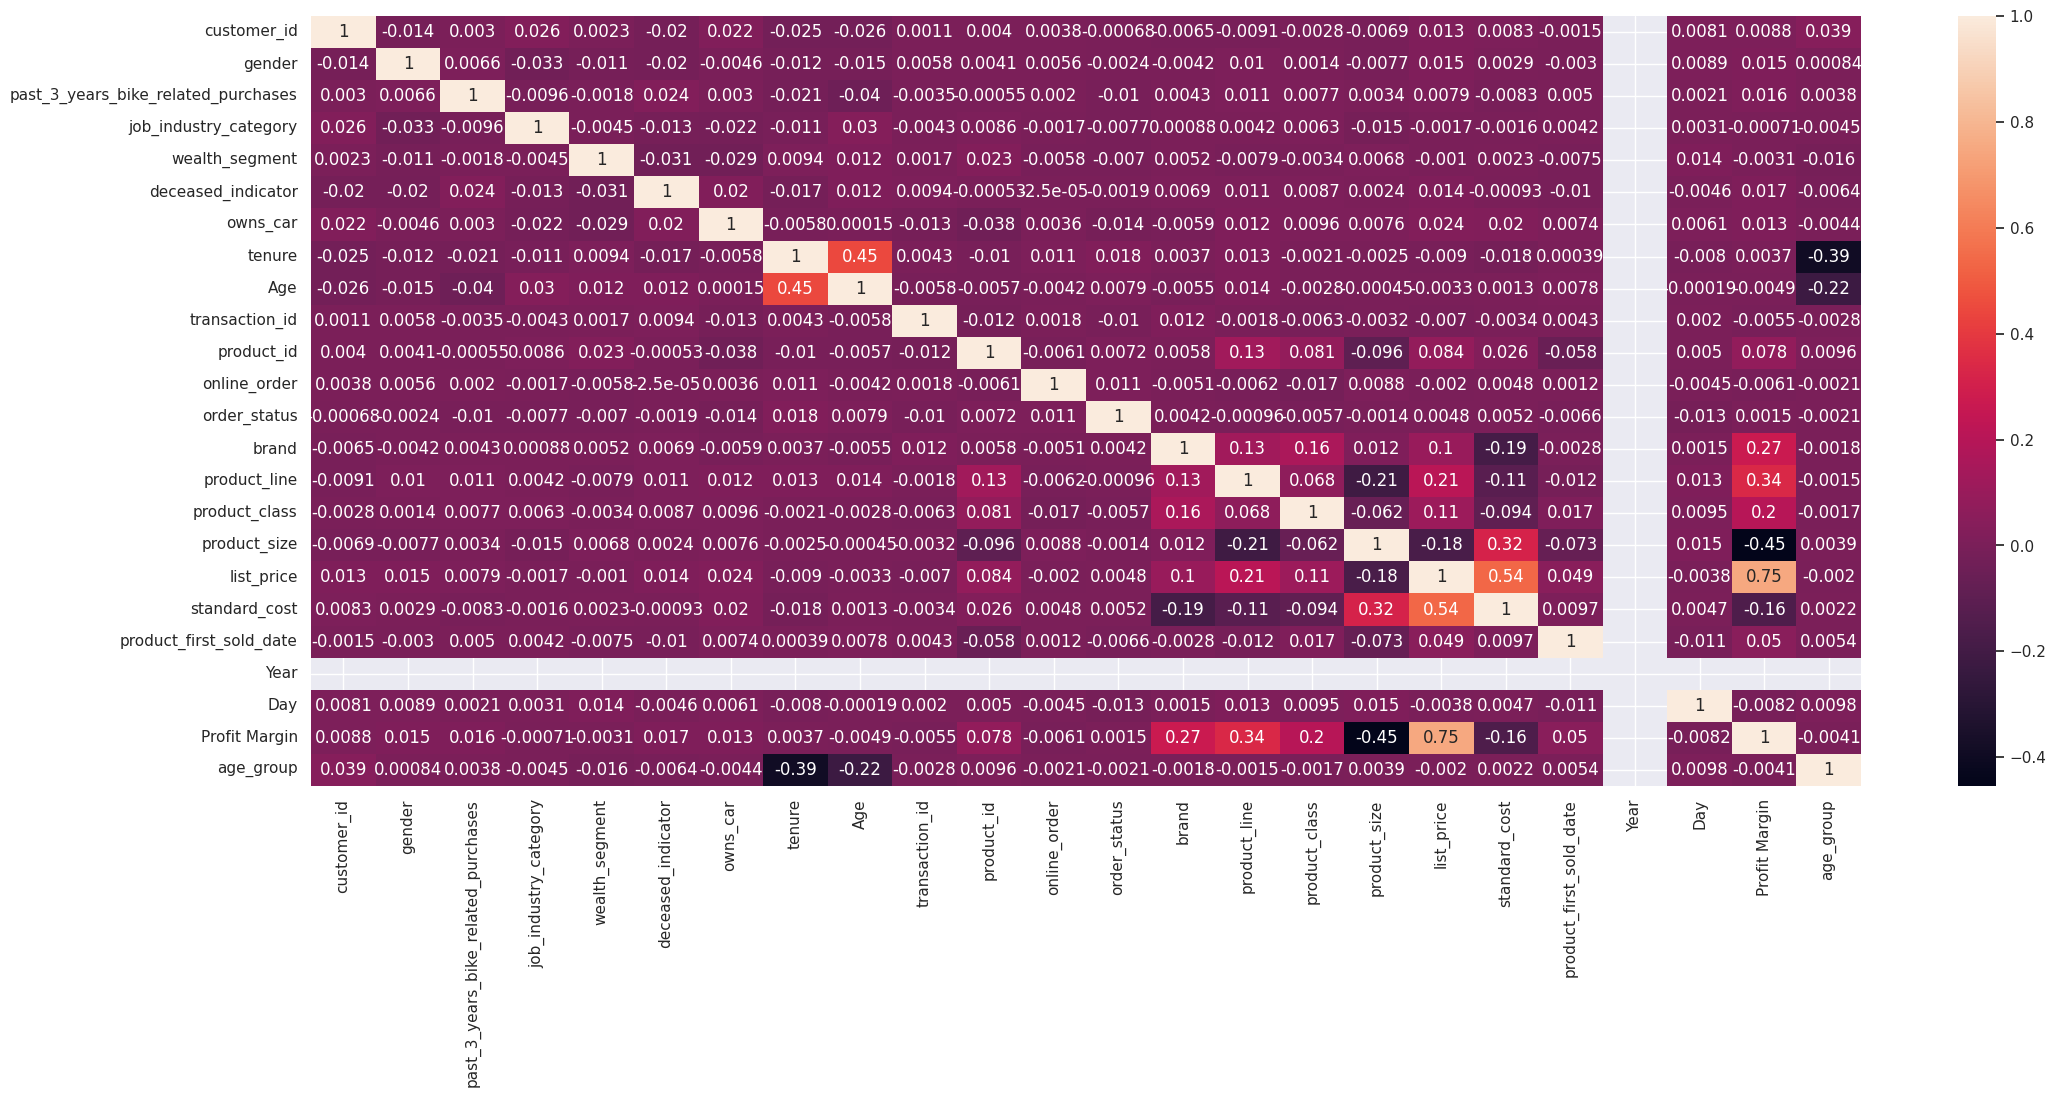

In [168]:
#use a heatmap to viasualize the above correlation
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot = True)
plt.show()